In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from sklearn.preprocessing import LabelEncoder

In [6]:
os.getcwd()

'C:\\Users\\mohan\\Downloads'

In [7]:
dt=pd.read_csv("Qualitative_Bankruptcy.data.txt",names=['Industrial Risk', 'ManagementRisk' ,'Financial Flexibility','Credibility','Competitiveness',' Operating Risk','class'])
dt.head(5)


,Industrial Risk,ManagementRisk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [8]:
target="class"

In [9]:
dt.isnull().sum()

Industrial Risk          0
ManagementRisk           0
Financial Flexibility    0
Credibility              0
Competitiveness          0
 Operating Risk          0
class                    0
dtype: int64

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
ManagementRisk           250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
 Operating Risk          250 non-null object
class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [12]:
dt.describe().transpose()

,count,unique,top,freq
Industrial Risk,250,3,N,89
ManagementRisk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
class,250,2,NB,143


In [25]:
dt.shape

(250, 7)

In [27]:
dt = pd.get_dummies(dt)
dt.head(10)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,ManagementRisk_A,ManagementRisk_N,ManagementRisk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,class_B,class_NB
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
5,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
6,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1
7,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1
8,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1
9,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1


In [29]:
dt.shape

(250, 20)

In [64]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
Industrial Risk_A          250 non-null uint8
Industrial Risk_N          250 non-null uint8
Industrial Risk_P          250 non-null uint8
ManagementRisk_A           250 non-null uint8
ManagementRisk_N           250 non-null uint8
ManagementRisk_P           250 non-null uint8
Financial Flexibility_A    250 non-null uint8
Financial Flexibility_N    250 non-null uint8
Financial Flexibility_P    250 non-null uint8
Credibility_A              250 non-null uint8
Credibility_N              250 non-null uint8
Credibility_P              250 non-null uint8
Competitiveness_A          250 non-null uint8
Competitiveness_N          250 non-null uint8
Competitiveness_P          250 non-null uint8
 Operating Risk_A          250 non-null uint8
 Operating Risk_N          250 non-null uint8
 Operating Risk_P          250 non-null uint8
class_NB                   250 non-null uint8
dtypes: uint8(19)
mem

In [30]:
X =  dt.drop("class_B", axis=1)
X =  X.drop("class_NB", axis=1)
y =  dt.pop("class_B")
print(X)

     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
0                    0                  0                  1   
1                    0                  1                  0   
2                    1                  0                  0   
3                    0                  0                  1   
4                    0                  1                  0   
5                    1                  0                  0   
6                    0                  0                  1   
7                    0                  0                  1   
8                    0                  0                  1   
9                    0                  0                  1   
10                   0                  0                  1   
11                   0                  0                  1   
12                   0                  1                  0   
13                   0                  1                  0   
14                   0                  

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=10)

In [45]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

In [46]:
Variance=np.cumsum(pca.explained_variance_ratio_)
Variance

array([0.26540428, 0.38836687, 0.49470452, 0.58724818, 0.66737542,
       0.74585444, 0.8107887 , 0.86587765, 0.91736868, 0.96312096,
       0.9876146 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

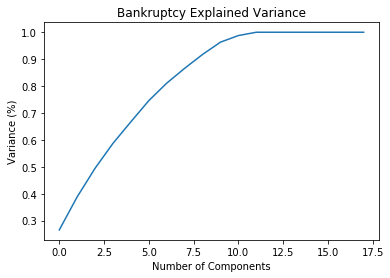

In [48]:
plt.figure()
plt.plot(Variance)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Bankruptcy Explained Variance')
plt.show()

In [49]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_train)
pcdt = pd.DataFrame(principalComponents)
pcdt.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.577901,-0.598729,0.131706,0.031098,-0.074806,-0.182771,-0.012034,-0.011670,0.138191,-0.059568,-0.120176
1,-1.027504,0.111965,1.072053,0.164490,-0.643416,-0.224926,0.806439,-0.614446,0.404651,0.166514,0.392089
2,1.577901,-0.598729,0.131706,0.031098,-0.074806,-0.182771,-0.012034,-0.011670,0.138191,-0.059568,-0.120176
3,-0.961263,0.103376,1.515507,0.379333,-0.340147,0.398497,0.276120,0.306755,0.386430,-0.209330,0.401832
4,-1.433933,-0.062645,0.061064,-0.537281,-1.223708,0.207602,-0.078280,-0.489296,-0.458245,0.342448,-0.043920


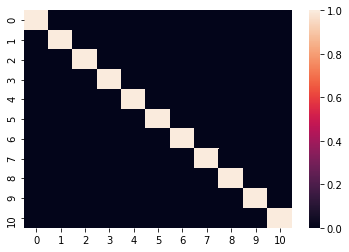

In [50]:
sns.heatmap(pcdt.corr())

In [51]:
 from sklearn.cluster import KMeans

# Let us check optimal number of clusters-


cluster_range = range( 1, 15)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(pcdt)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,767.662953
1,2,581.602577
2,3,531.020054
3,4,484.748477
4,5,446.928448
5,6,412.439566
6,7,400.808809
7,8,376.788920
8,9,359.390326
9,10,339.584820


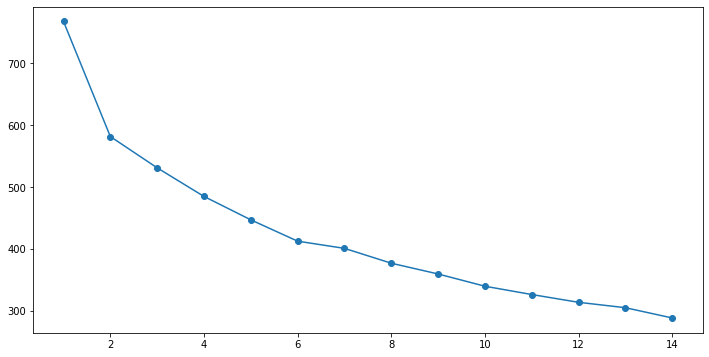

In [52]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.002016678572612817


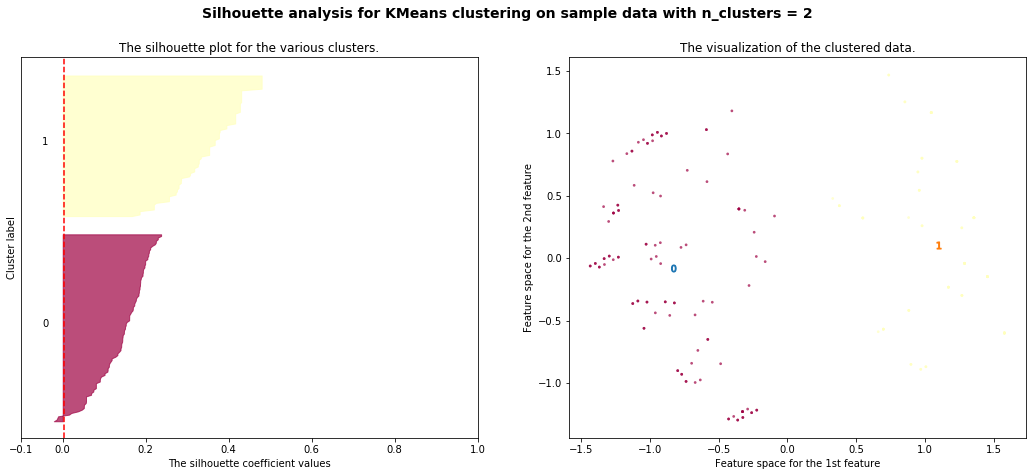

For n_clusters = 3 The average silhouette_score is : -0.014521974027433254


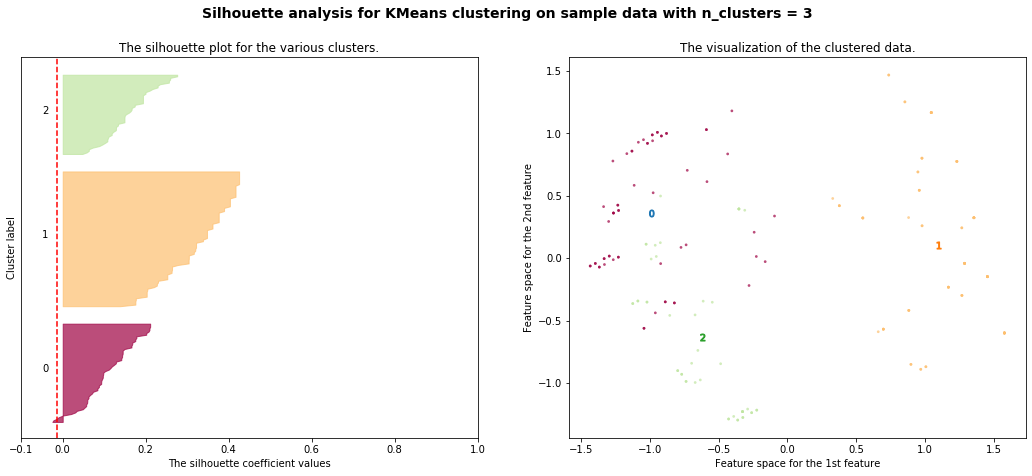

For n_clusters = 4 The average silhouette_score is : -0.03593852769898358


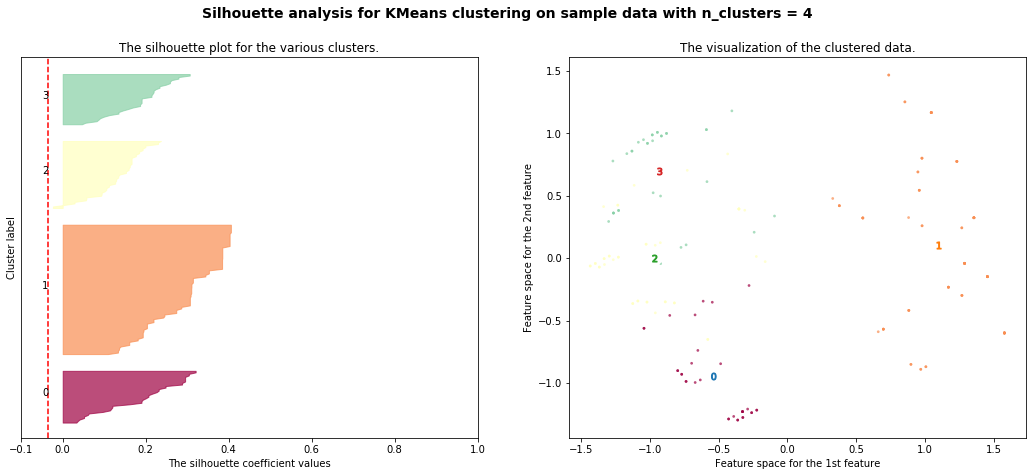

For n_clusters = 5 The average silhouette_score is : -0.0492653653787873


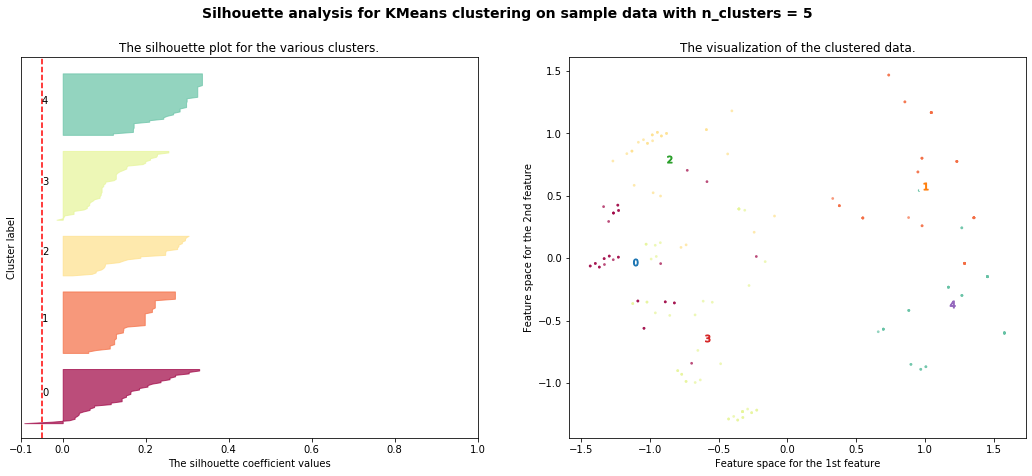

For n_clusters = 6 The average silhouette_score is : -0.053766295508991216


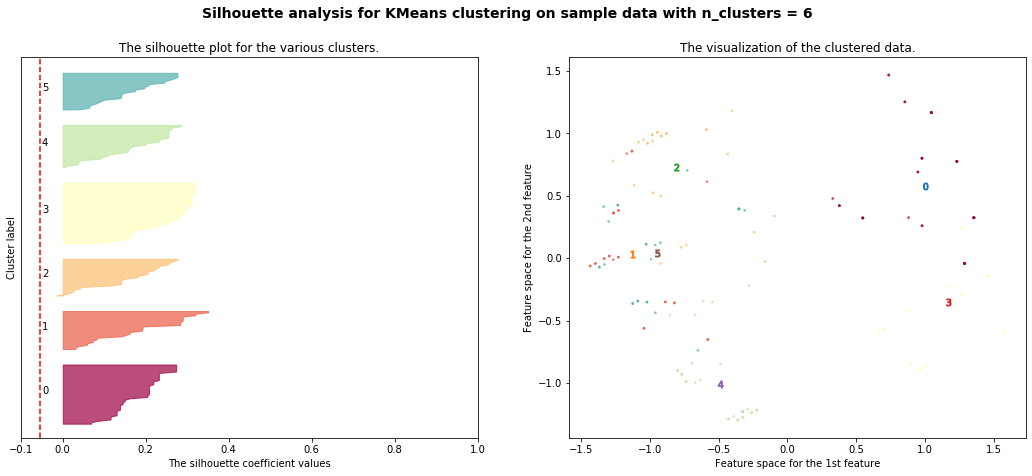

For n_clusters = 7 The average silhouette_score is : -0.06025234109064019


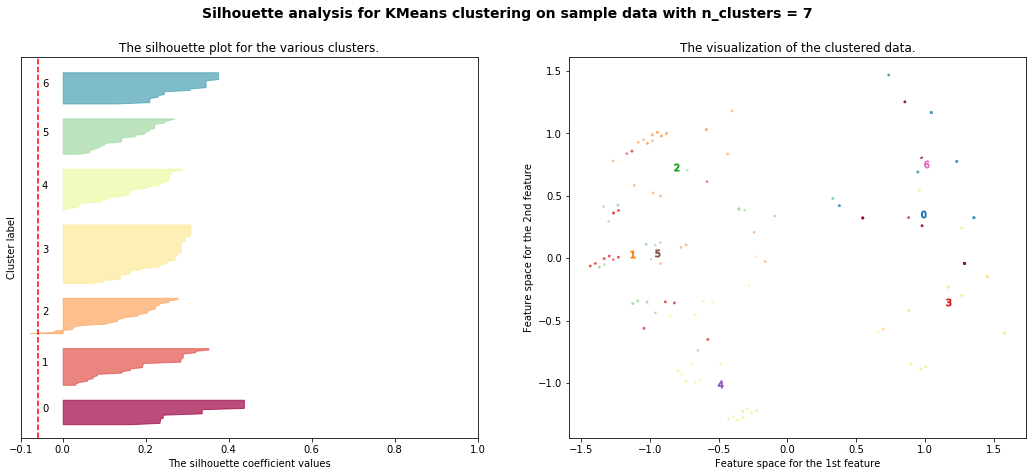

For n_clusters = 8 The average silhouette_score is : -0.07152613263664531


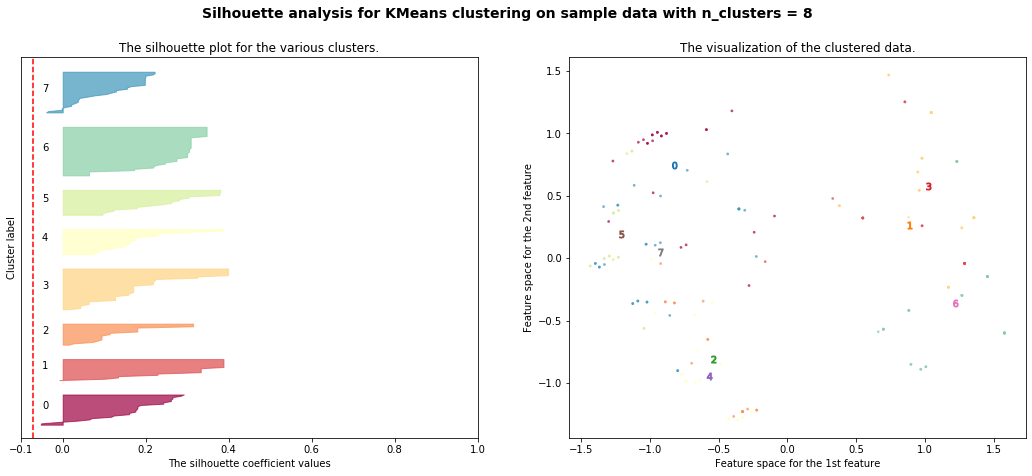

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pcdt) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pcdt)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCdf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pcdt, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(principalComponents[:, 0], principalComponents[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
               marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [59]:
#Now form clusters out of the train data
# Number of clusters

kmeans = KMeans(n_clusters=2, random_state=5)

# Fitting the input data

kmeans = kmeans.fit(pcdt)

# Getting the cluster labels

labels = kmeans.predict(pcdt)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

print("labels", labels)

Centroid values
sklearn
[[-0.82842689 -0.08079655  0.03677734  0.07442668  0.02536818  0.00265984
   0.02976327  0.00404372  0.01631603 -0.01383898 -0.00922084]
 [ 1.09814728  0.1071024  -0.04875136 -0.09865862 -0.03362759 -0.00352583
  -0.03945364 -0.00536027 -0.02162822  0.0183447   0.01222298]]
labels [1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0]


In [60]:
#taking all cluster labels into clust_arr numpy arr
print("Before: ", principalComponents.shape)
principalComponentsNew = np.column_stack((principalComponents, labels))
print("After: ", principalComponentsNew.shape)

Before:  (200, 11)
After:  (200, 12)


In [61]:
principalComponentsTest = pca.fit_transform(X_test)
print(principalComponentsTest.shape)

(50, 11)


In [62]:
#use the same Kmeans object which was used for train data

kmeans = kmeans.fit(principalComponentsTest)

# Getting the cluster labels for the test data and storing it in labels_test
labels_test = kmeans.predict(principalComponentsTest)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

print("labels_test", labels_test)

Centroid values
sklearn
[[-9.05892807e-01 -1.84466170e-02  9.21389295e-02  9.16177338e-04
   4.42868973e-02 -1.06367890e-02 -4.32673809e-02  1.33968413e-02
   1.75305411e-02  4.41382595e-03  9.20594434e-03]
 [ 1.15295448e+00  2.34775125e-02 -1.17267728e-01 -1.16604389e-03
  -5.63651421e-02  1.35377315e-02  5.50675757e-02 -1.70505253e-02
  -2.23115978e-02 -5.61759667e-03 -1.17166564e-02]]
labels_test [0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 0]


In [63]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print("svc_model score train : ",svc_model.score(X_train, y_train))
print("svc_model score test : ",svc_model.score(X_test, y_test))

1.0
1.0
Confusion Matrix:
 [[29  0]
 [ 0 21]]
1.0
1.0
1.0
1.0
svc_model score train :  0.975
svc_model score test :  1.0
